In [1]:
import os
os.getcwd()

'/Users/yuechenjiang/Desktop/code'

In [2]:
cd change_LLM

/Users/yuechenjiang/Desktop/code/change_LLM


In [4]:
import pandas as pd
df_GPT3_5 = pd.read_csv('dat_df_GPT3.5_turbo.csv') # 2022-04-04 - 2022-12-27
df_dav = pd.read_csv('dat_df_davicin003.csv') # 2022-04-04 - 2022-12-27  # davinci-003
df_GPT4 = pd.read_csv('TSLA_GPT4.csv')# 2022-04-04 - 2022-12-27
df_GPT4_Turbo = pd.read_csv('Tsla_GPT4_turbo.csv')
df_Llama = pd.read_csv('dat_df_llama.csv') # 2022-06-16 - 2022-12-27

In [4]:
import yfinance as yf
Start = '2022-06-16'
End = '2022-12-28'
Ticker = 'TSLA'
df = yf.download(Ticker, start=Start, end=End)
price = df['Adj Close'].tolist()

[*********************100%%**********************]  1 of 1 completed


In [5]:
df_GPT3_5['date'] = pd.to_datetime(df_GPT3_5['date'])
df_dav['date'] = pd.to_datetime(df_dav['date'])
df_GPT4['date'] = pd.to_datetime(df_GPT4['date'])
df_GPT4_Turbo['date'] = pd.to_datetime(df_GPT4_Turbo['date'])
df_Llama['date'] = pd.to_datetime(df_Llama['date'])
GPT3_5 = df_GPT3_5[(df_GPT3_5['date'] >= Start) & (df_GPT3_5['date'] < End)]['direction'].tolist()
dav = df_dav[(df_dav['date'] >= Start) & (df_dav['date'] < End)]['direction'].tolist()
GPT = df_GPT4[(df_GPT4['date'] >= Start) & (df_GPT4['date'] < End)]['direction'].tolist()
GPT_Turbo = df_GPT4_Turbo[(df_GPT4_Turbo['date'] >= Start) & (df_GPT4_Turbo['date'] < End)]['direction'].tolist()
Llama = df_Llama[(df_Llama['date'] >= Start) & (df_Llama['date'] < End)]['direction'].tolist()
len(GPT_Turbo)

/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000gn/T/ipykernel_67428/1527562290.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_GPT3_5['date'] = pd.to_datetime(df_GPT3_5['date'])
/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000gn/T/ipykernel_67428/1527562290.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dav['date'] = pd.to_datetime(df_dav['date'])
/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000gn/T/ipykernel_67428/1527562290.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_GPT4['date'] = pd.to_datetime(df_GPT4['date'])
/var/folders/kg/pwzs55h51hb6x5vbsqjvxhjc0000

134

In [6]:
import numpy as np
def reward_list(price, actions):
    reward = 0
    reward_list = [0]
    for i in range(len(price)-1):
        reward += actions[i] * np.log(price[i+1]/price[i])
        reward_list.append(reward)
    return reward_list

In [7]:
B_H = [1] * 496
B_H_rw = reward_list(price, B_H)
GPT3_5_rw = reward_list(price, GPT3_5)
dav_rw = reward_list(price, dav)
GPT_rw = reward_list(price, GPT)
GPT_Turbo_rw = reward_list(price, GPT_Turbo)
Llama_rw = reward_list(price, Llama)

In [8]:
Date = df_dav[(df_dav['date'] >= Start) & (df_dav['date'] < End)]['date'].tolist()

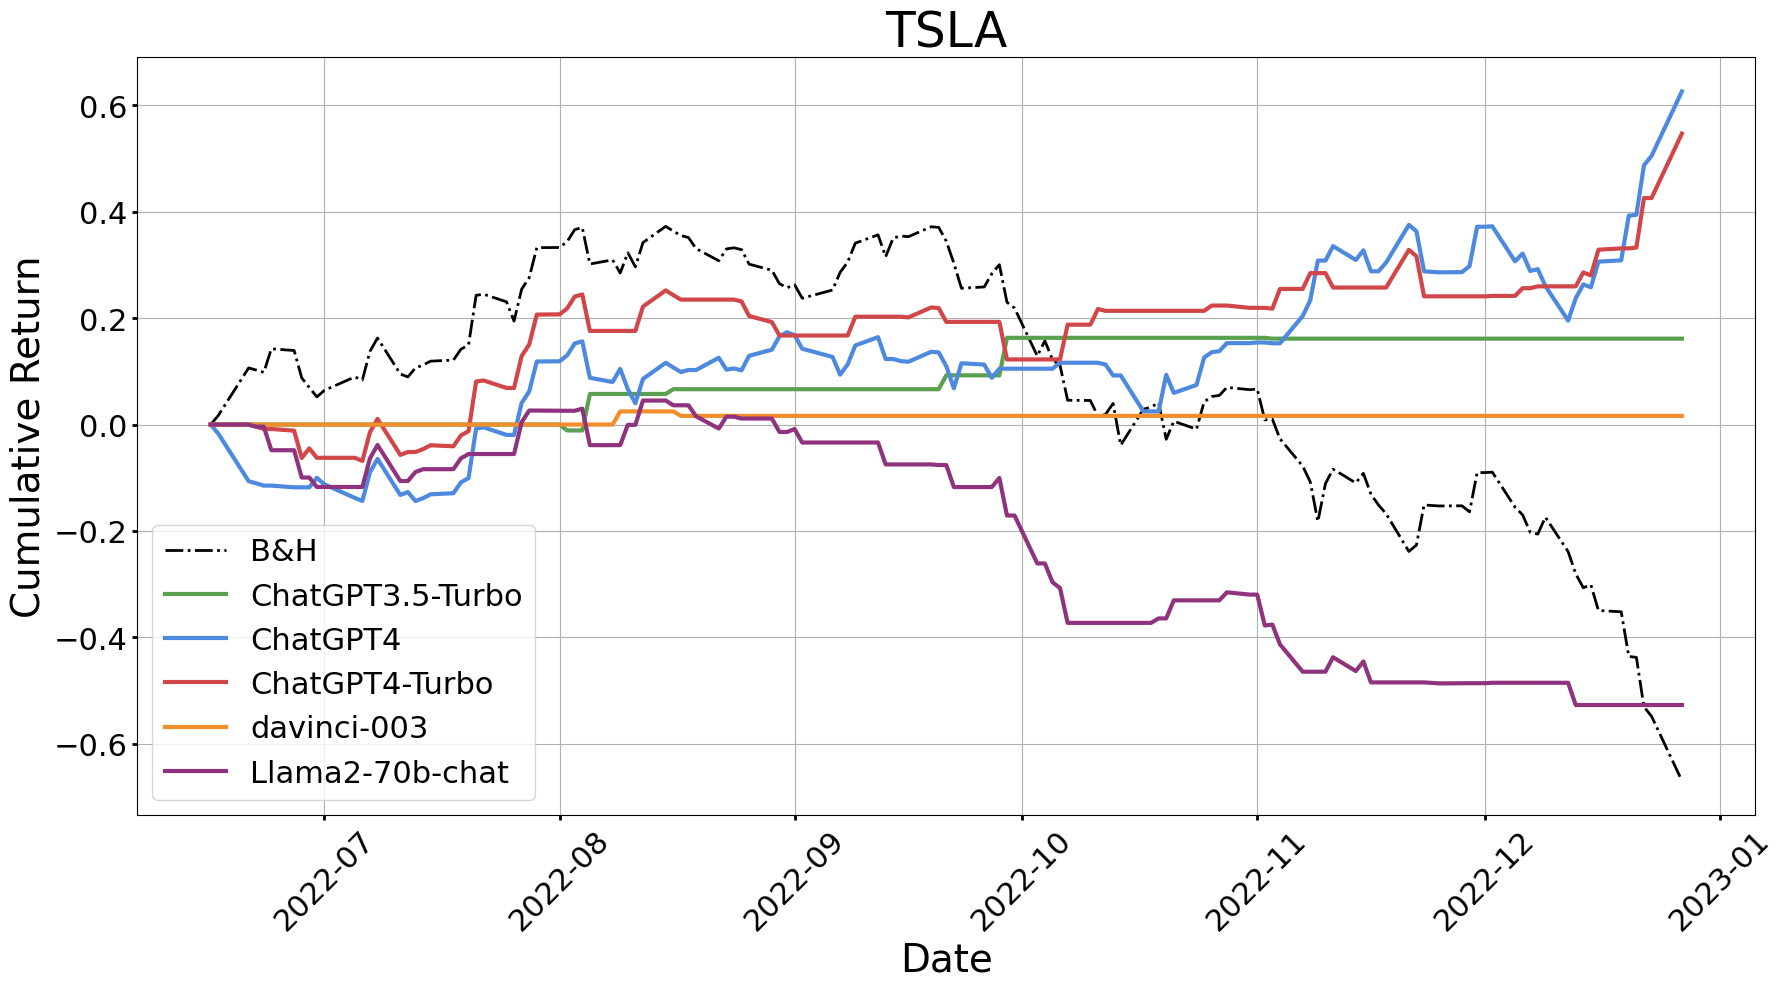

In [9]:
import matplotlib.pyplot as plt
import datetime

dates = pd.to_datetime(Date).tolist()
fig, ax = plt.subplots(figsize=(18, 10))

# Plotting the three lists
plt.plot(dates, B_H_rw, linewidth=2, label='B&H', linestyle='-.', color = '#000')
plt.plot(dates, GPT3_5_rw, linewidth=3, label='ChatGPT3.5-Turbo', color = '#59a14f')
plt.plot(dates, GPT_rw, linewidth=3, label='ChatGPT4', color = '#4e89e0')
plt.plot(dates, GPT_Turbo_rw, linewidth=3, label='ChatGPT4-Turbo', color = '#d14749')
plt.plot(dates, dav_rw, linewidth=3, label='davinci-003', color = '#f28e2b')
plt.plot(dates, Llama_rw, linewidth=3, label='Llama2-70b-chat', color = '#8F337F')

# Set the labels and title
ax.set_xlabel('Date', fontsize=28)
ax.set_ylabel('Cumulative Return', fontsize=28)
plt.title(Ticker, fontsize=35)

# Customize the legend
ax.legend(fontsize=22, frameon=True)

# Customize the grid
ax.grid(True)

# Customize the tick labels on both axes
ax.tick_params(axis='x', labelsize=22, width=2, rotation=45)  # Rotate x-axis labels
ax.tick_params(axis='y', labelsize=22, width=2)  # y-axis labels

# Apply tight layout to ensure everything fits without overlapping
plt.tight_layout()

plt.savefig('TSLA_LLM.png', format='png', dpi=300)
# Show the plot
plt.show()